<a href="https://colab.research.google.com/github/DEEPANSHIMISHRA/Data-Analysis/blob/main/Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Attrition Rate: 16.12%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441

Confusion Matrix:
[[380   0]
 [ 61   0]]
Model Coefficients:
          Feature  Coefficient
0             Age    -0.034493
1  YearsAtCompany    -0.055414
2   MonthlyIncome    -0.000062


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


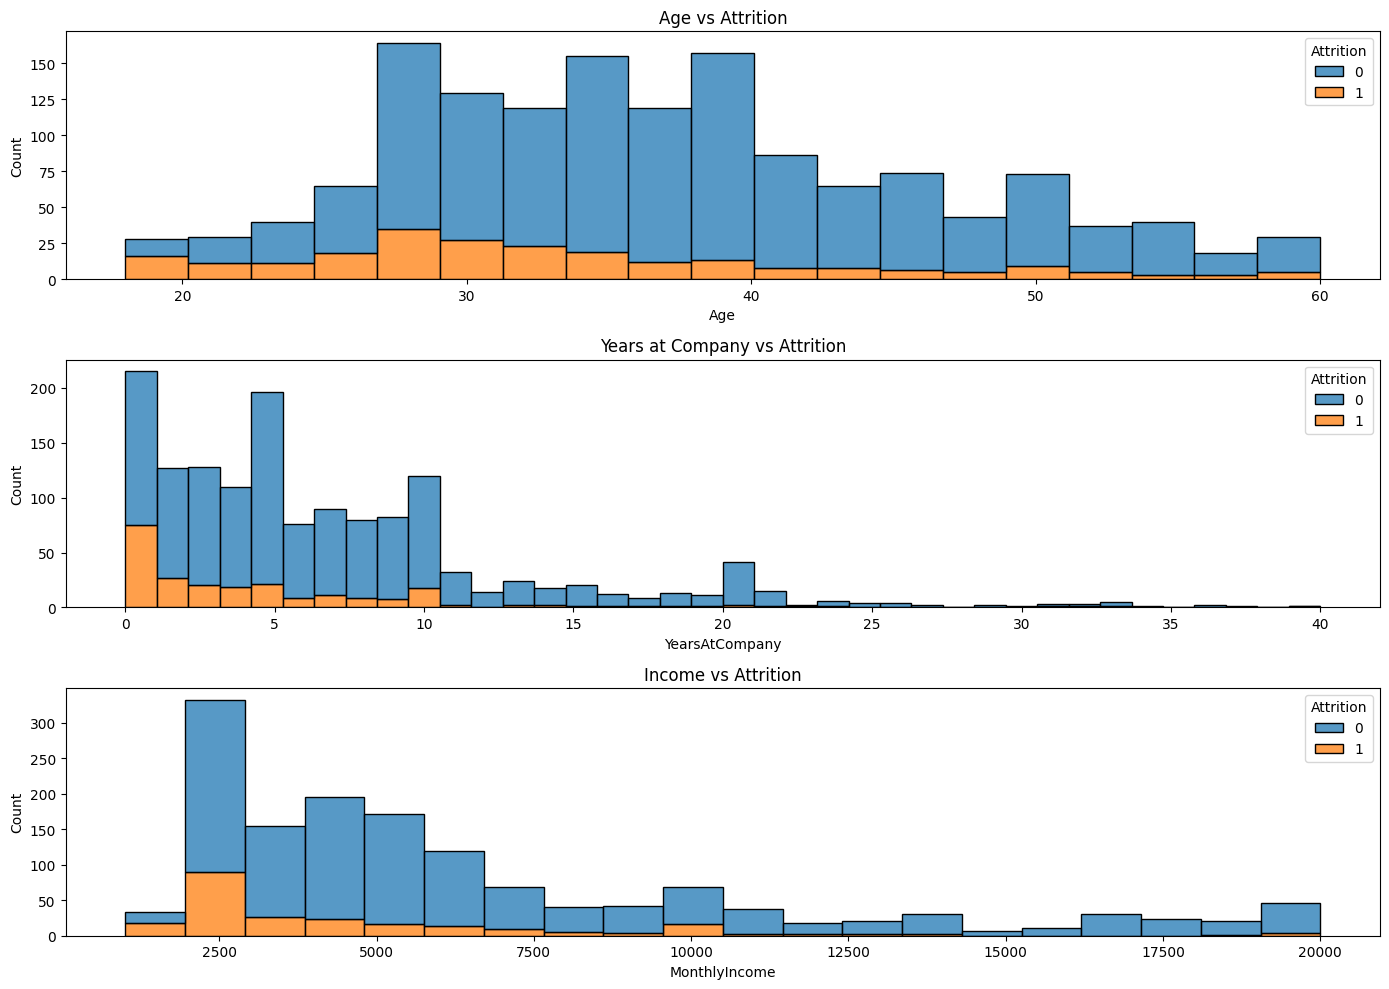

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/greendestination (1) (1).csv')

# Calculate attrition rate
attrition_rate = data['Attrition'].value_counts(normalize=True)['Yes'] * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")

# Encode categorical variable 'Attrition'
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select features and target variable
features = ['Age', 'YearsAtCompany', 'MonthlyIncome']
X = data[features]
y = data['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Coefficients of the model
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})
print("Model Coefficients:")
print(coefficients)

# Visualize the data
plt.figure(figsize=(14, 10))

# Age vs Attrition
plt.subplot(3, 1, 1)
sns.histplot(data=data, x='Age', hue='Attrition', multiple='stack')
plt.title('Age vs Attrition')

# Years at Company vs Attrition
plt.subplot(3, 1, 2)
sns.histplot(data=data, x='YearsAtCompany', hue='Attrition', multiple='stack')
plt.title('Years at Company vs Attrition')

# Income vs Attrition
plt.subplot(3, 1, 3)
sns.histplot(data=data, x='MonthlyIncome', hue='Attrition', multiple='stack')
plt.title('Income vs Attrition')

plt.tight_layout()
plt.show()
